## Purpose
Predict which customers are likely to leave (churn) so the telecom company can take retention actions.


#### Data Colletion 
Dataset Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### Section 1 : Data Loading & Initial inspection

In [2]:
import sys
print(sys.executable)

c:\Users\vital\churn-prediction-production-mlops\venv\python.exe


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
# First few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Last rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
# Shape
df.shape

(7043, 21)

In [11]:
# Column Names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
# dataset info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Section 2: Data Quality Check

In [43]:
#Check for misshing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [44]:
#Check Duplicates
df.duplicated().sum()

0

In [45]:
#check totalcharge column
print((df['TotalCharges'].isnull()).sum())
print(df['TotalCharges'].head(20))

11
0       29.85
1     1889.50
2      108.15
3     1840.75
4      151.65
5      820.50
6     1949.40
7      301.90
8     3046.05
9     3487.95
10     587.45
11     326.80
12    5681.10
13    5036.30
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19    1862.90
Name: TotalCharges, dtype: float64


In [46]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Section 3: Basic Statistical Summary

In [50]:
#Statistical summary for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [52]:
#Stats summary for all
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


Check unique values for categorical columns

In [57]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].nunique()} unique values')
    print(df[col].value_counts())
    print("-" * 20)


customerID: 7043 unique values
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------
gender: 2 unique values
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------
Partner: 2 unique values
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------
Dependents: 2 unique values
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------
PhoneService: 2 unique values
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------
MultipleLines: 3 unique values
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------
InternetService: 3 unique values
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: cou

Summary for numerical columns only

In [59]:
num_col = ['tenure', 'MonthlyCharges','TotalCharges']
df[num_col].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [62]:
df[num_col].head(5)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Check for outliers

In [71]:
# Check for outliers using IQR method for tenure
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
IQR = q3 - q1
print(f'Tenure\nq1: {q1}\nq3: {q3}, \nIQR: {IQR}')

Tenure
q1: 9.0
q3: 55.0, 
IQR: 46.0


In [74]:
# Check for outliers in MonthlyCharges
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
print(f"MonthlyCharges  \nQ1: {Q1}, \nQ3: {Q3}, \nIQR: {IQR}")

MonthlyCharges  
Q1: 35.5, 
Q3: 89.85, 
IQR: 54.349999999999994


In [75]:
# Check for outliers in TotalCharges
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
print(f"TotalCharges \nQ1: {Q1}, \nQ3: {Q3}, \nIQR: {IQR}")

TotalCharges 
Q1: 401.45, 
Q3: 3794.7375, 
IQR: 3393.2875000000004


### Section 4: Target Variable Analysis (Churn)

In [84]:
#Count of churned vs retained customers
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [85]:
# Percentage of churn
churn_counts = df['Churn'].value_counts()
churn_percentage = (churn_counts / len(df)) * 100
print(churn_percentage)

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


Visualization of the data

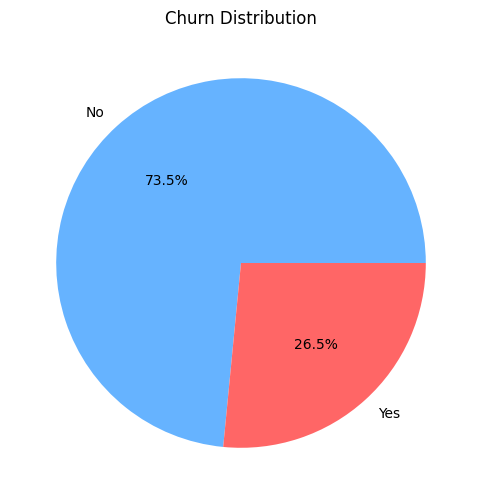

In [86]:
# Visualize churn distribution - Pie chart
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff6666'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()



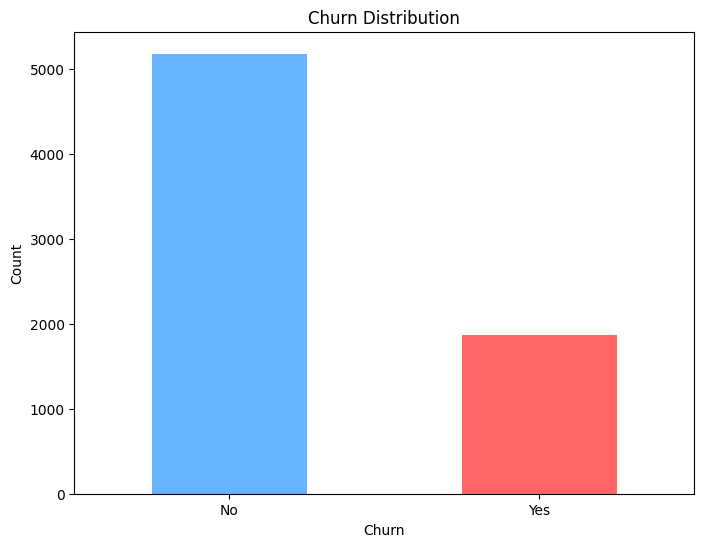

In [87]:
# Visualize churn distribution - Bar plo
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar', color=['#66b3ff','#ff6666'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Churn Rate: 26.5% About 1 in 4 customers are churning - this is significant! 

The dataset is imbalanced, which is seems like a realistic churn rate for telecom industry


### Section 5: Numerical Features Analysis

 Distribution of tenure

Text(0, 0.5, 'Frequency')

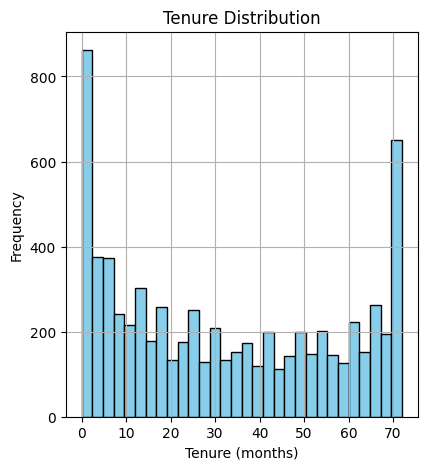

In [88]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['tenure'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

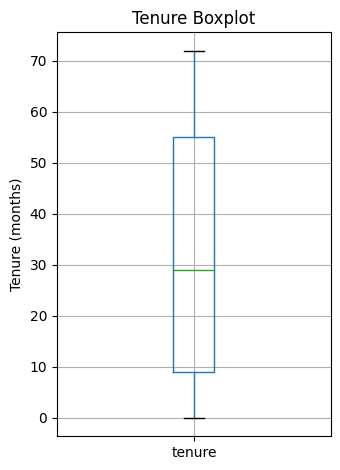

In [89]:
plt.subplot(1, 2, 2)
df.boxplot(column='tenure')
plt.title('Tenure Boxplot')
plt.ylabel('Tenure (months)')
plt.tight_layout()
plt.show()

Distribution of MonthlyCharges

Text(0, 0.5, 'Frequency')

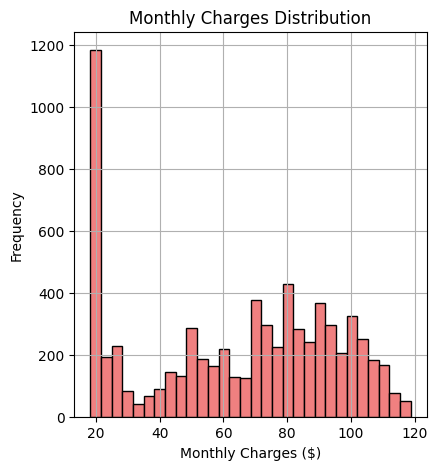

In [90]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['MonthlyCharges'].hist(bins=30, color='lightcoral', edgecolor='black')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')

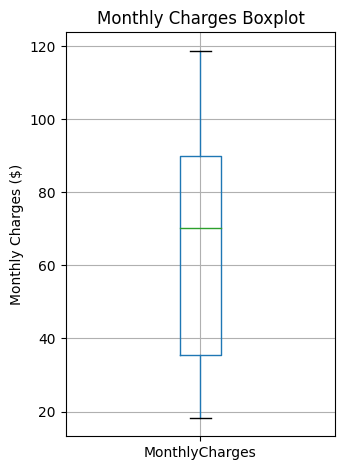

In [91]:
plt.subplot(1, 2, 2)
df.boxplot(column='MonthlyCharges')
plt.title('Monthly Charges Boxplot')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()


Distribution of TotalCharges

Text(0, 0.5, 'Frequency')

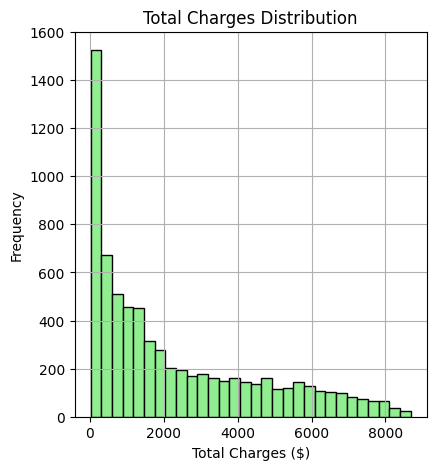

In [92]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['TotalCharges'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')

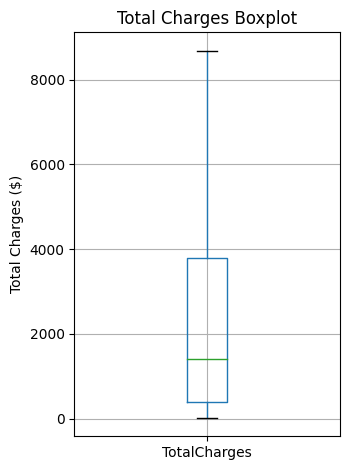

In [93]:
plt.subplot(1, 2, 2)
df.boxplot(column='TotalCharges')
plt.title('Total Charges Boxplot')
plt.ylabel('Total Charges ($)')
plt.tight_layout()
plt.show()

In [94]:
# Check skewness
print(f"Tenure Skewness: {df['tenure'].skew():.2f}")
print(f"MonthlyCharges Skewness: {df['MonthlyCharges'].skew():.2f}")
print(f"TotalCharges Skewness: {df['TotalCharges'].skew():.2f}")

Tenure Skewness: 0.24
MonthlyCharges Skewness: -0.22
TotalCharges Skewness: 0.96




### Overall Observations:
- All three numerical features are in reasonable ranges with no extreme outliers
- **Tenure** and **TotalCharges** are related (longer tenure = higher total charges)
- **MonthlyCharges** shows clear customer segmentation by service level
- Data quality is good - distributions make business sense


### Section 6: Categorical Features Analysis

In [97]:
# List all categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Gender distribution

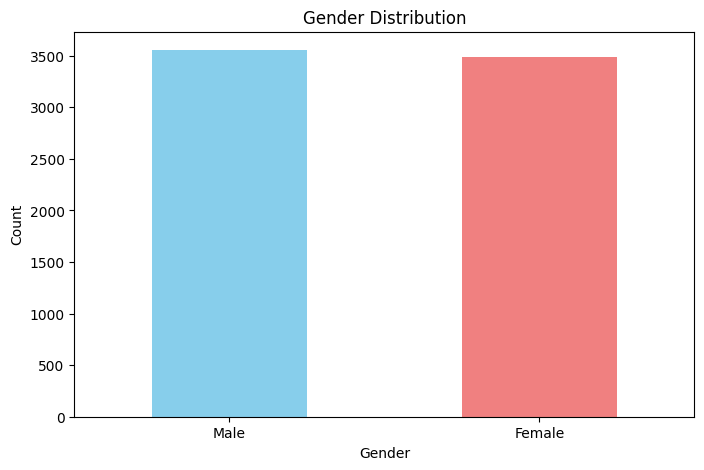

In [98]:

plt.figure(figsize=(8, 5))
df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [106]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

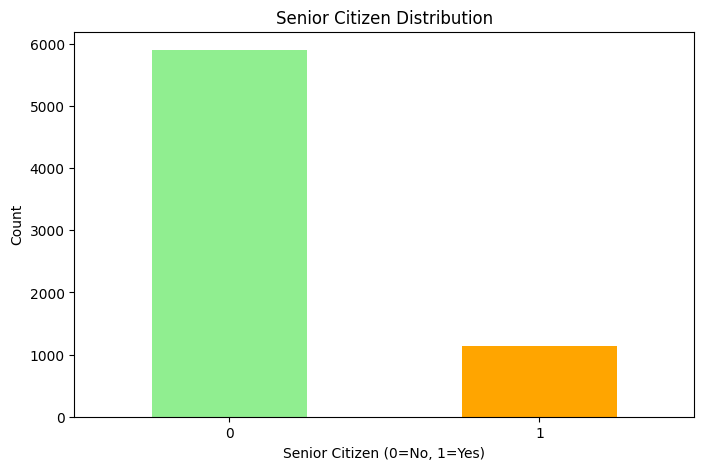

In [107]:
# SeniorCitizen distribution
plt.figure(figsize=(8, 5))
df['SeniorCitizen'].value_counts().plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Partner distribution

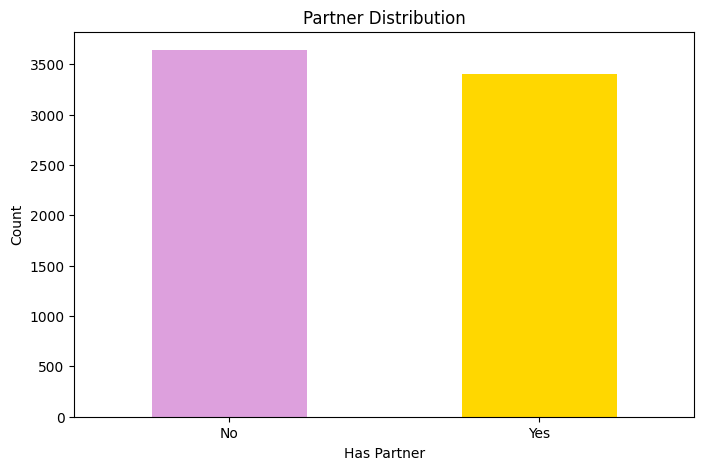

In [108]:
plt.figure(figsize=(8, 5))
df['Partner'].value_counts().plot(kind='bar', color=['plum', 'gold'])
plt.title('Partner Distribution')
plt.xlabel('Has Partner')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dependents distribution

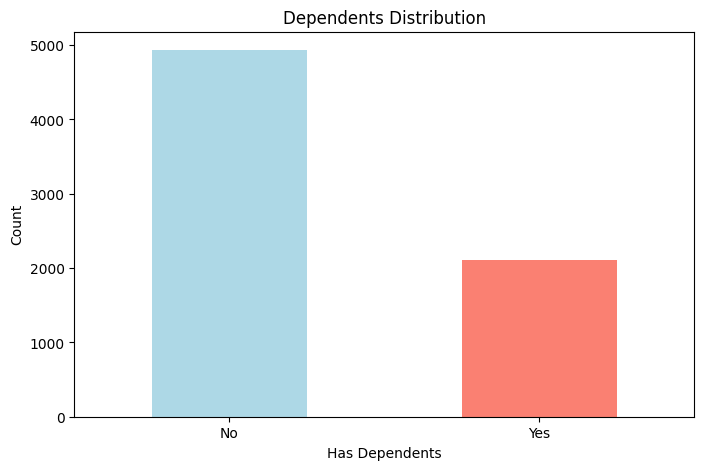

In [109]:
plt.figure(figsize=(8, 5))
df['Dependents'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Dependents Distribution')
plt.xlabel('Has Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Contract type distribution

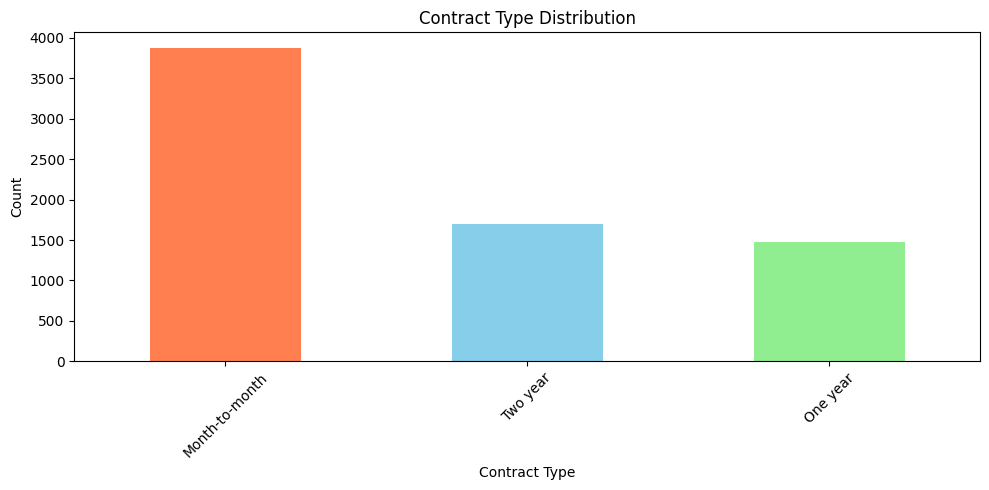

In [110]:
plt.figure(figsize=(10, 5))
df['Contract'].value_counts().plot(kind='bar', color=['coral', 'skyblue', 'lightgreen'])
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Internet Distribution 

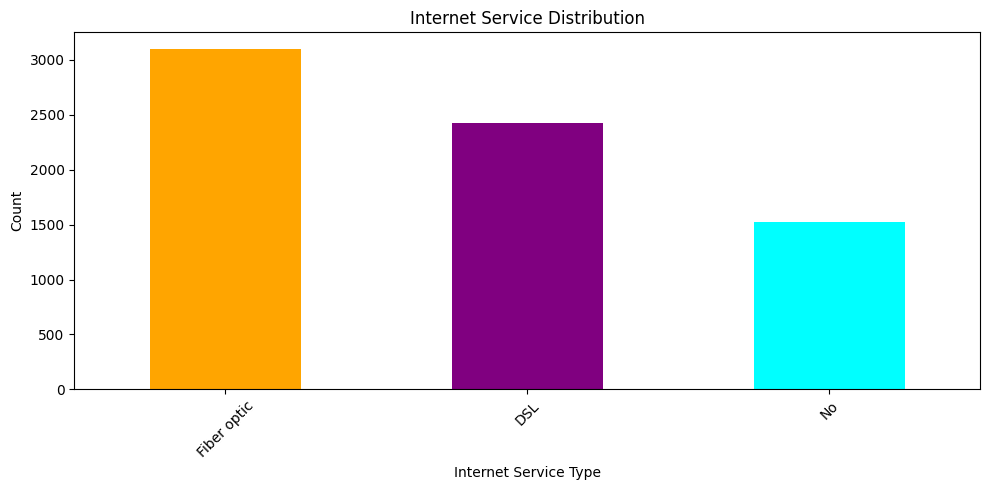

In [111]:
plt.figure(figsize=(10, 5))
df['InternetService'].value_counts().plot(kind='bar', color=['orange', 'purple', 'cyan'])
plt.title('Internet Service Distribution')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Payment Method Distribution

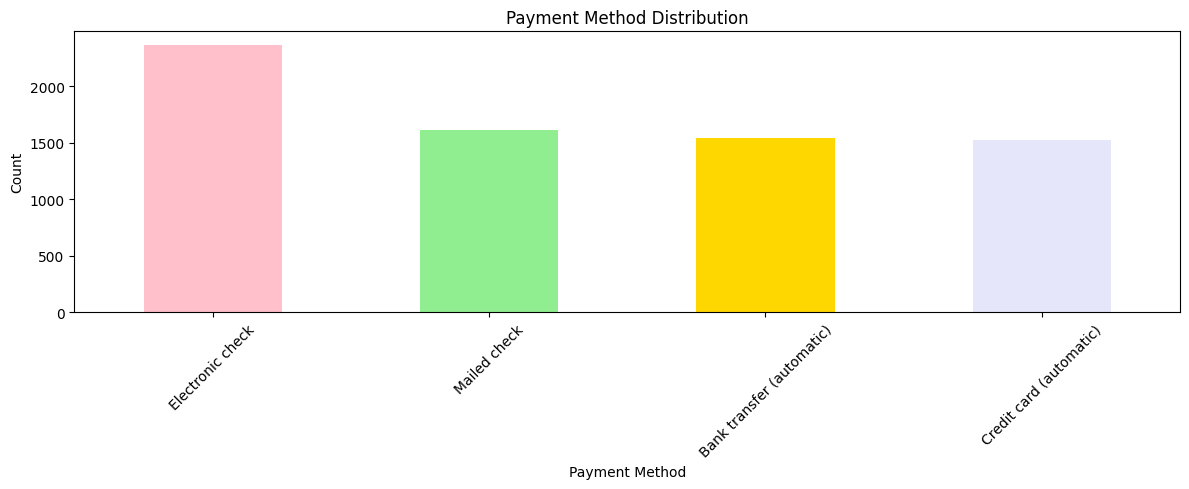

In [112]:
plt.figure(figsize=(12, 5))
df['PaymentMethod'].value_counts().plot(kind='bar', color=['pink', 'lightgreen', 'gold', 'lavender'])
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Important Observations:
1. **customerID** is unique for each customer - should be dropped for modeling
2. **Month-to-month contracts** dominate - these customers might have higher churn rates
3. Many customers are not adopting add-on services (security, backup, tech support)
4. Fiber optic internet is the most popular service type


### Section 7: Bivariate Analysis (Features vs Churn)

Categorical features vs Churn - Multiple plots


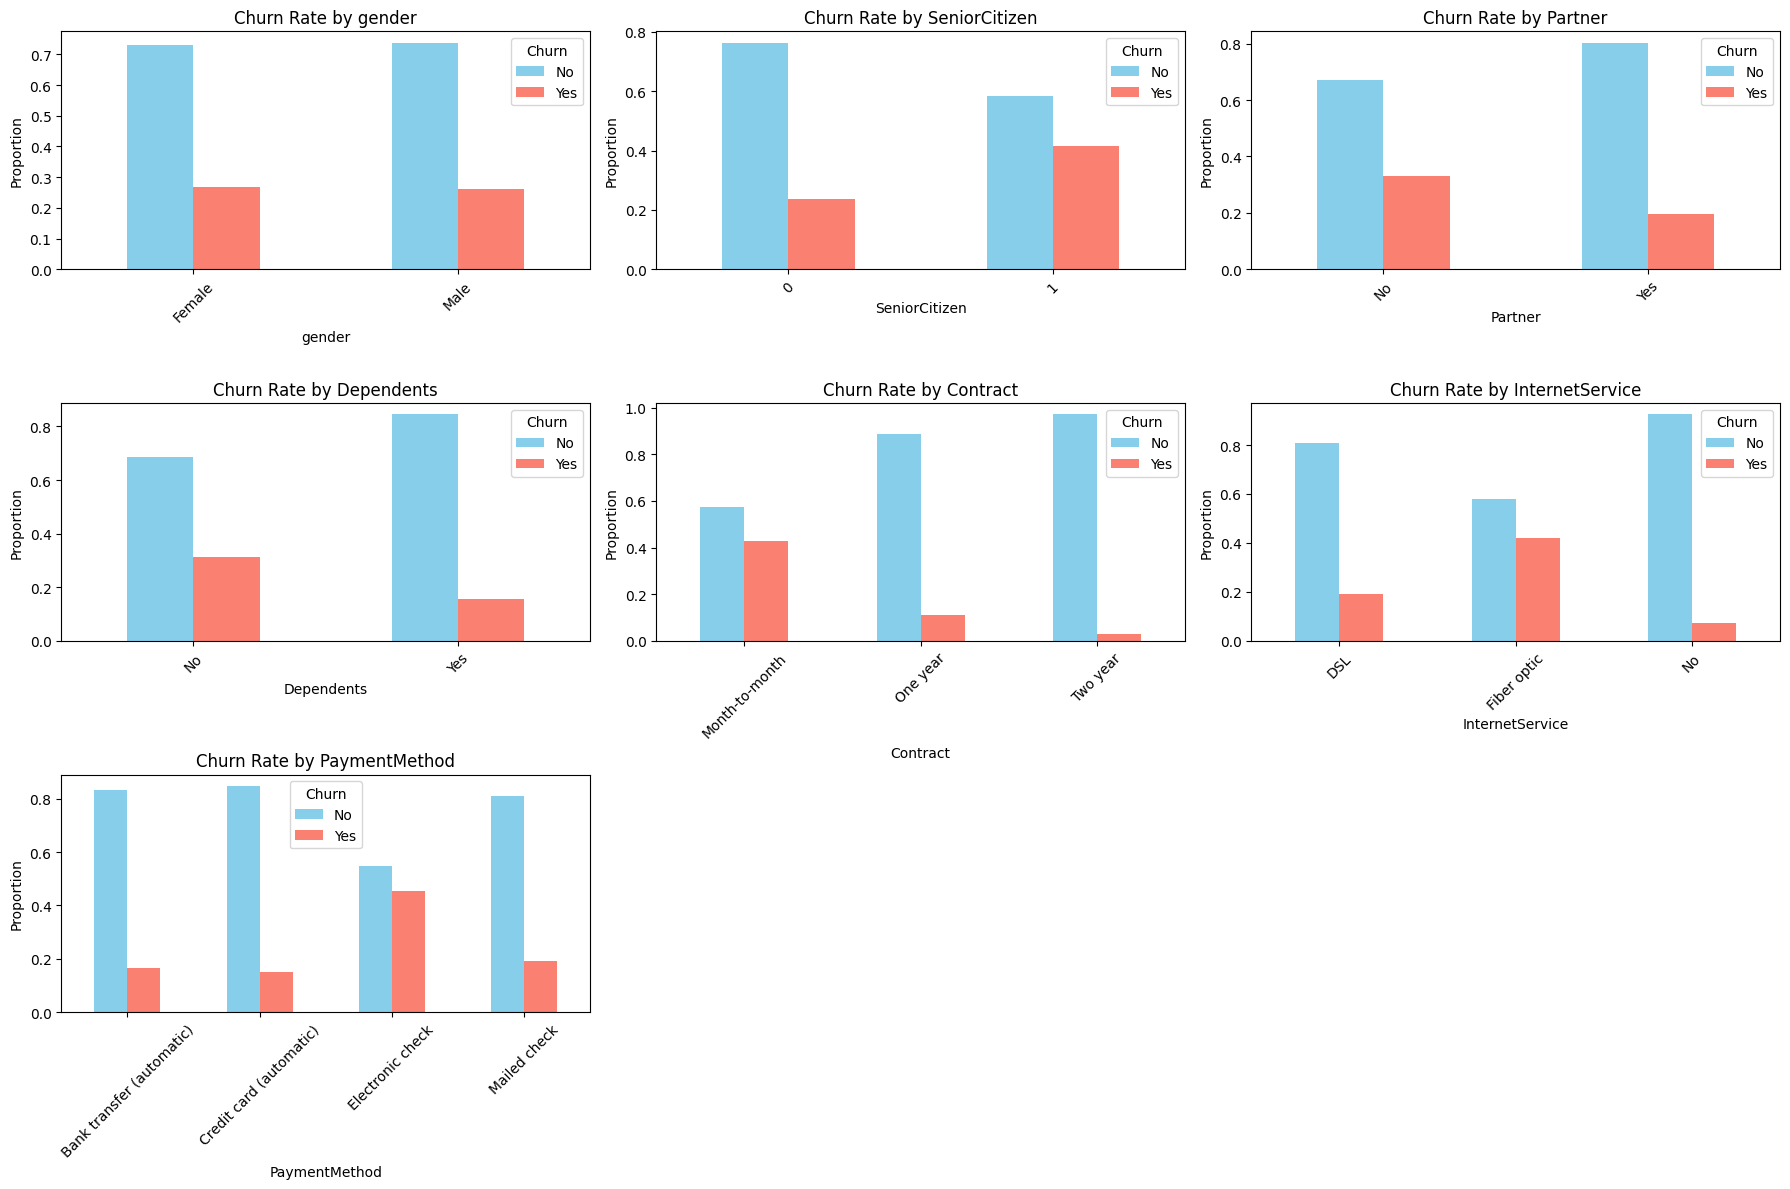

In [ ]:

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'InternetService', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Churn', loc='best')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


##### Categorical Features vs Churn Analysis Summary:

**Weak Impact on Churn:**
- **Gender**: No significant difference - both Male and Female have similar churn rates (~26%)

**Strong Impact on Churn:**
- **SeniorCitizen**: Senior citizens have 41% churn rate vs 24% for non-seniors - significantly higher risk
- **Partner**: Customers without partners have 33% churn vs 20% with partners - living alone increases churn
- **Dependents**: Customers without dependents have 31% churn vs 15% with dependents - family responsibility reduces churn

**Very Strong Impact on Churn (Top Predictors):**
- **Contract Type**: Month-to-month contracts have 42% churn, One year has 11%, Two year has only 3% - strongest predictor!
- **InternetService**: Fiber optic users have 42% churn vs 19% for DSL and 7% for no internet - major issue with fiber service
- **PaymentMethod**: Electronic check users have 45% churn (highest!) vs 16-19% for automatic payments - payment method matters significantly

**Key Insight**: Contract type, internet service quality, and payment method are the strongest categorical predictors of churn.


Numerical features vs Churn

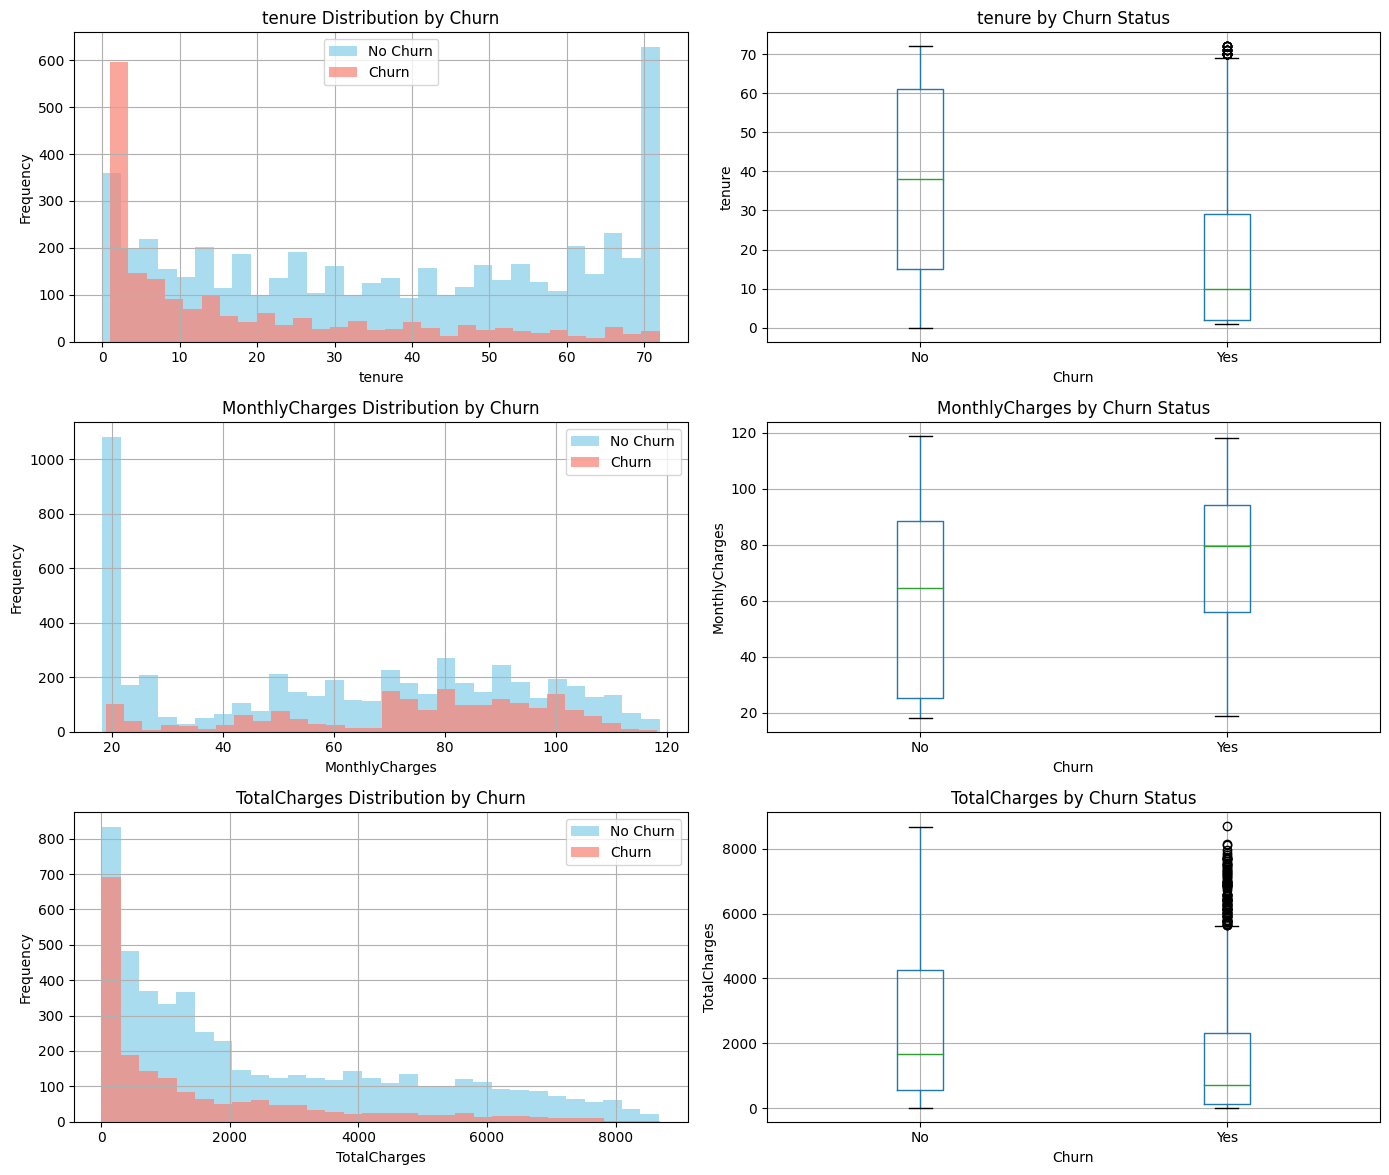

In [ ]:

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, col in enumerate(numerical_features):
    
    df[df['Churn'] == 'No'][col].hist(bins=30, alpha=0.7, label='No Churn', color='skyblue', ax=axes[i, 0])
    df[df['Churn'] == 'Yes'][col].hist(bins=30, alpha=0.7, label='Churn', color='salmon', ax=axes[i, 0])
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title(f'{col} Distribution by Churn')
    axes[i, 0].legend()
    

    df.boxplot(column=col, by='Churn', ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} by Churn Status')
    axes[i, 1].set_xlabel('Churn')
    axes[i, 1].set_ylabel(col)
    axes[i, 1].get_figure().suptitle('')

plt.tight_layout()
plt.show()


#### Bivariate Analysis Summary: Numerical Features vs Churn

**Tenure (Customer Lifetime):**
- Churned customers are concentrated in the 0-10 months range (new customers)
- Retained customers are spread across all tenure levels, with many long-term customers (60-72 months)
- **Insight**: New customers are at highest churn risk - critical to retain them in first year

**Monthly Charges:**
- Churned customers have significantly higher monthly charges (median ~$80)
- Retained customers have lower monthly charges (median ~$65)
- **Insight**: Higher bills drive churn - customers paying premium prices are more likely to leave

**Total Charges:**
- Churned customers have very low total charges (mostly under $1,000) - they're new customers
- Retained customers have higher accumulated charges (spread from $1,000 to $8,000+)
- **Insight**: Low total charges = new customers = high churn risk (reinforces tenure finding)

**Key Insight**: The "danger zone" is new customers (low tenure, low total charges) paying high monthly bills. This segment needs immediate retention focus.


### Correlation Analysis

In [126]:

df_corr = df.copy()

# Encode binary categorical variables
df_corr['gender'] = df_corr['gender'].map({'Male': 1, 'Female': 0})
df_corr['Partner'] = df_corr['Partner'].map({'Yes': 1, 'No': 0})
df_corr['Dependents'] = df_corr['Dependents'].map({'Yes': 1, 'No': 0})
df_corr['PhoneService'] = df_corr['PhoneService'].map({'Yes': 1, 'No': 0})
df_corr['PaperlessBilling'] = df_corr['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

df_corr.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [128]:
# Select only numerical and encoded columns for correlation
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 
                  'gender', 'Partner', 'Dependents', 'PhoneService', 
                  'PaperlessBilling', 'Churn']

# Calculate correlation matrix
correlation_matrix = df_corr[numerical_cols].corr()
correlation_matrix


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,-0.001874,0.016479,-0.211185,0.008576,0.156530,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,0.005106,0.379697,0.159712,0.008448,0.006152,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,-0.014569,0.096848,-0.113890,0.247398,0.352150,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,0.157830,-0.199484
gender,-0.001874,0.005106,-0.014569,0.000048,1.000000,-0.001808,0.010517,-0.006488,-0.011754,-0.008612
Partner,0.016479,0.379697,0.096848,0.319072,-0.001808,1.000000,0.452676,0.017706,-0.014877,-0.150448
Dependents,-0.211185,0.159712,-0.113890,0.064653,0.010517,0.452676,1.000000,-0.001762,-0.111377,-0.164221
PhoneService,0.008576,0.008448,0.247398,0.113008,-0.006488,0.017706,-0.001762,1.000000,0.016505,0.011942
PaperlessBilling,0.156530,0.006152,0.352150,0.157830,-0.011754,-0.014877,-0.111377,0.016505,1.000000,0.191825
Churn,0.150889,-0.352229,0.193356,-0.199484,-0.008612,-0.150448,-0.164221,0.011942,0.191825,1.000000


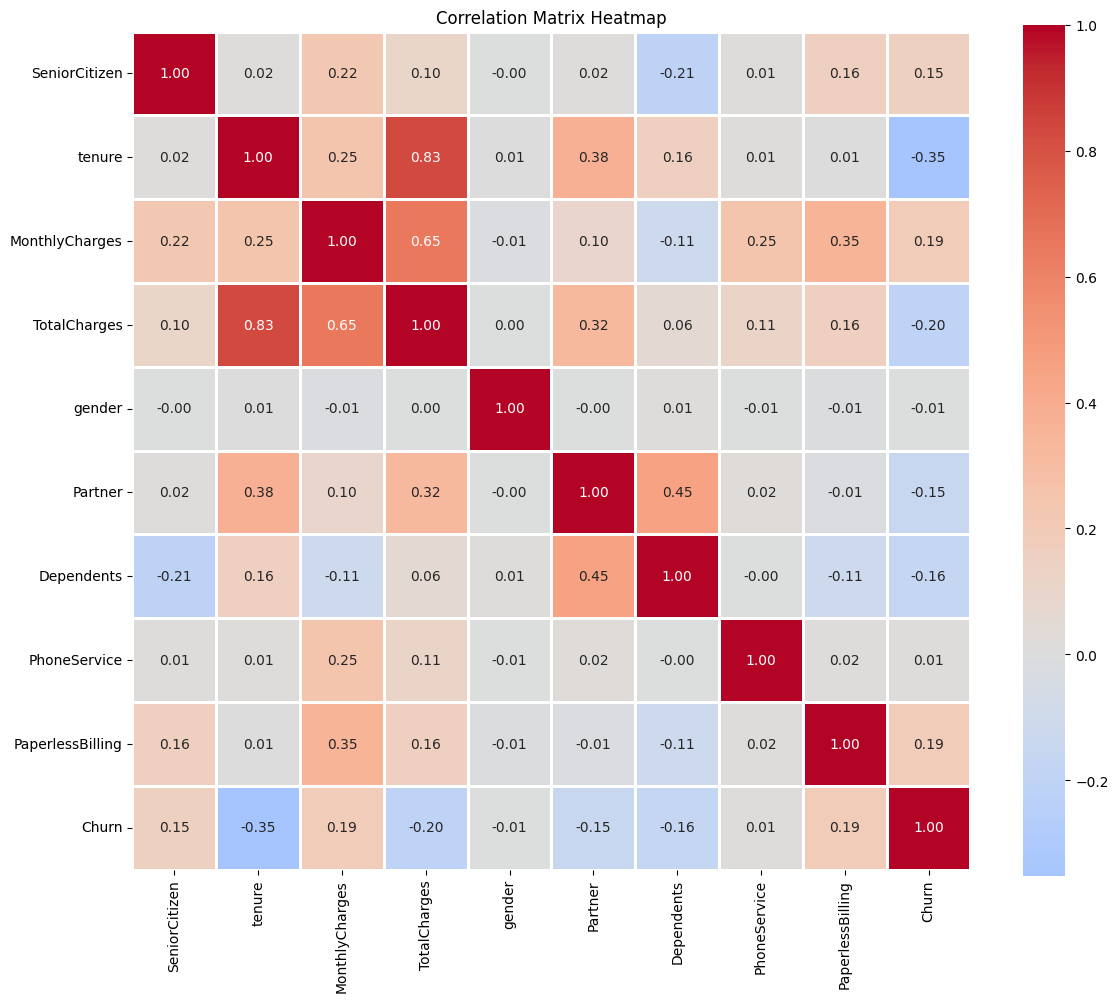

In [121]:
# Visualize correlation matrix with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


In [122]:

# Focus on correlations with Churn (target variable)
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print("Correlation with Churn:")
print(churn_correlation)

Correlation with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.199484
tenure             -0.352229
Name: Churn, dtype: float64


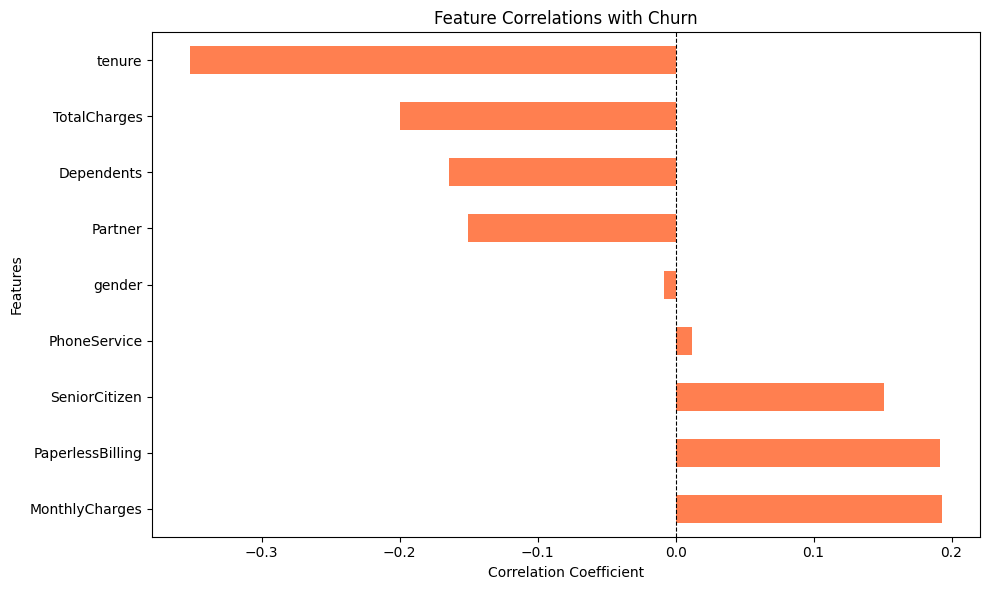

In [123]:
# Visualize correlations with Churn
plt.figure(figsize=(10, 6))
churn_correlation.drop('Churn').plot(kind='barh', color='coral')
plt.title('Feature Correlations with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


**Top Correlations with Churn:**
- **tenure (-0.35)**: Strongest - longer customers churn less
- **TotalCharges (-0.20)**: Higher spending = less churn
- **MonthlyCharges (0.19)**: Higher bills = more churn
- **PaperlessBilling (0.19)**: Paperless users churn more
- **Dependents (-0.16), Partner (-0.15)**: Family reduces churn
- **Gender (-0.01)**: No impact


# EDA Key Insights & Recommendations

## Summary
- 7,043 customers, 26.5% churn rate
- Clean data, no missing values

## Top Churn Drivers
1. **Contract**: Month-to-month (42%) vs Two year (3%)
2. **Tenure**: New customers (0-10 months) churn most
3. **Internet**: Fiber optic (42%) vs DSL (19%)
4. **Payment**: Electronic check (45%) vs Auto payments (16%)
5. **Charges**: Higher bills = more churn
6. **Demographics**: Seniors (41%), No partner (33%), No dependents (31%)

## Recommendations
1. Push annual contracts
2. Promote auto payments
3. Fix fiber service quality
4. Retain first-year customers
5. Target seniors/singles
6. Bundle add-on services

## ML Notes
**Drop**: customerID, possibly TotalCharges (multicollinearity) 

**Handle**: Class imbalance (SMOTE/weights), encode categoricals

**Top Features**: Contract, Tenure, InternetService, PaymentMethod, MonthlyCharges